In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import time

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('talk')
%matplotlib inline

from modules import IO

In [2]:
data_folder = 'data/'
n_top = 1000

movies = IO(data_folder + 'top{}_all.pkl'.format(n_top)).read_pickle()
tmdb_genres_list = IO(data_folder + 'tmdb_genres_list.pkl').read_pickle()
imdb_genres_list = IO(data_folder + 'imdb_genres_list.pkl').read_pickle()

In [3]:
print(len(movies))
print(movies[0].keys())
movies[0]

1000
odict_keys(['tmdb_title', 'tmdb_genre_ids', 'tmdb_genres', 'tmdb_overview', 'tmdb_rating', 'tmdb_votes', 'imdb_title', 'imdb_genre_ids', 'imdb_genres', 'imdb_plot', 'imdb_synopsis', 'imdb_rating', 'imdb_votes'])


OrderedDict([('tmdb_title', 'Fifty Shades Freed'),
             ('tmdb_genre_ids', [6, 13]),
             ('tmdb_genres', ['Drama', 'Romance']),
             ('tmdb_overview',
              'Believing they have left behind shadowy figures from their past, newlyweds Christian and Ana fully embrace an inextricable connection and shared life of luxury. But just as she steps into her role as Mrs. Grey and he relaxes into an unfamiliar stability, new threats could jeopardize their happy ending before it even begins.'),
             ('tmdb_rating', 6.2),
             ('tmdb_votes', 1009),
             ('imdb_title', 'Fifty Shades Freed'),
             ('imdb_genre_ids', [0, 2, 13]),
             ('imdb_genres', ['Drama', 'Romance', 'Thriller']),
             ('imdb_plot',
              ['Believing they have left behind shadowy figures from their past, newlyweds Christian and Ana fully embrace an inextricable connection and shared life of luxury. But just as she steps into her role as Mrs. Gr

In [4]:
print(len(tmdb_genres_list))
print(tmdb_genres_list)
print(len(imdb_genres_list))
print(imdb_genres_list)

19
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
20
['Drama', 'Crime', 'Romance', 'Animation', 'Mystery', 'Sci-Fi', 'Biography', 'Action', 'Western', 'Fantasy', 'Musical', 'Sport', 'Adventure', 'Thriller', 'Family', 'Music', 'War', 'Horror', 'History', 'Comedy']


In [5]:
tmdb_genres_count = np.zeros(len(tmdb_genres_list), dtype=int)
imdb_genres_count = np.zeros(len(imdb_genres_list), dtype=int)

for m in movies:
    for i in m['tmdb_genre_ids']:
        tmdb_genres_count[i] += 1
    for i in m['imdb_genre_ids']:
        imdb_genres_count[i] += 1

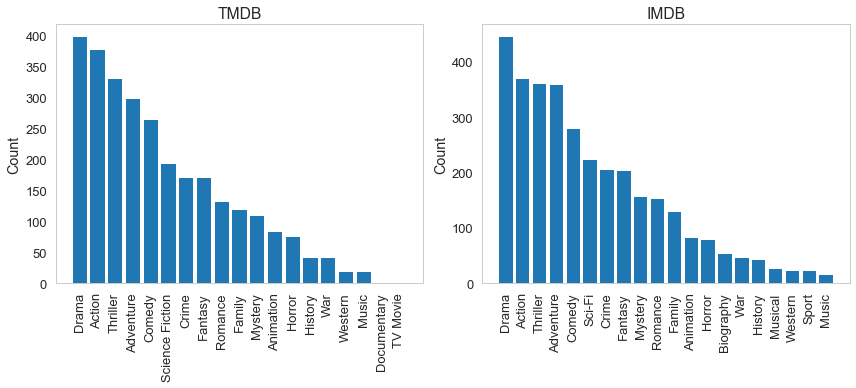

In [6]:
plt.figure(figsize=(12, 5.5))

plt.subplot(1, 2, 1)
plt.bar(range(len(tmdb_genres_count)), tmdb_genres_count[np.argsort(tmdb_genres_count)[::-1]]);
plt.xticks(range(len(tmdb_genres_count)), np.array(tmdb_genres_list)[np.argsort(tmdb_genres_count)[::-1]], \
           rotation=90);
plt.ylabel('Count');
plt.title('TMDB');

plt.subplot(1, 2, 2)
plt.bar(range(len(imdb_genres_count)), imdb_genres_count[np.argsort(imdb_genres_count)[::-1]]);
plt.xticks(range(len(imdb_genres_count)), np.array(imdb_genres_list)[np.argsort(imdb_genres_count)[::-1]], \
           rotation=90);
plt.ylabel('Count');
plt.title('IMDB');
plt.tight_layout();